# Analysis of Stock Prices from 2012 to 2018



In this notebook I will examine 3 stocks. Activision, Apple and Microsoft.
Each stock will be represented as a time series starting from 2012 and ending at the end of 2018.

I will analyse : 
* The 9 and 30 day moving average of each stock
* The volatility rate of each stock 
* The actual change in stock price
* Compare the 3 stocks together and try find trends 


In [ ]:
import urllib.request
import requests
import numpy as np
import pandas as pd
link = "http://mlg.ucd.ie/modules/COMP30760/stocks/aapl.html"
response = urllib.request.urlopen(link)
html = response.read().decode()

link1 = "http://mlg.ucd.ie/modules/COMP30760/stocks/atvi.html"
response1 = urllib.request.urlopen(link1)
html1 = response1.read().decode()

link2 = "http://mlg.ucd.ie/modules/COMP30760/stocks/msft.html"
response2 = urllib.request.urlopen(link2)
html2 = response2.read().decode()

## Parsing the data
After reading in the stocks from the html pages using the requests package I then analysed the html pages to see where each piece of information was contained. I found that it was in a line with <'tr'>.....<'tr'> and then within that was <'td'>....<'td'> and this was where the stock data was held. Below I am extracting the data by looking at the first index all the way to the 8th.

## Apple Stock Parsing

In [ ]:
import bs4
parser = bs4.BeautifulSoup(html, "html.parser")
year = parser.find('h3')
companys = []
for tr in parser.find_all("tr"):
    company = tr.find_all('td')[0].text.strip() 
    year = tr.find_all('td')[1].text.strip()
    month = tr.find_all('td')[2].text.strip()
    day = tr.find_all('td')[3].text.strip() 
    open1 = tr.find_all('td')[4].text.strip()
    high = tr.find_all('td')[5].text.strip() 
    low = tr.find_all('td')[6].text.strip() 
    close = tr.find_all('td')[7].text.strip() 
    companys.extend([company,year,month,day,
                     open1,high,low,close])
#Removing the headers of the data 
companys.remove('Stock')
companys.remove('Year')
companys.remove('Month')
companys.remove('Day')
companys.remove('Open')
companys.remove('High')
companys.remove('Low')
companys.remove('Close')

#changing the numpy array dimensions
change_array = np.array([companys])
change_array.shape = (-1,8)

apple = pd.DataFrame(change_array, columns = ["Stock","Year","Month","Day", "Open", "High","Low","Close"])
#Dropping the indexes that contained the headers from each year.
apple = apple.drop(apple.index[[250,503,756,1009,1262,1514]], axis=0).reset_index()



## Activision Stock Parsing

In [103]:
parser1 = bs4.BeautifulSoup(html1, "html.parser")
year1 = parser1.find('h3')
companys1 = []
for tr1 in parser1.find_all("tr"):
    company1 = tr1.find_all('td')[0].text.strip() 
    year1 = tr1.find_all('td')[1].text.strip()
    month1 = tr1.find_all('td')[2].text.strip()
    day1 = tr1.find_all('td')[3].text.strip() 
    open2 = tr1.find_all('td')[4].text.strip()
    high1 = tr1.find_all('td')[5].text.strip() 
    low1 = tr1.find_all('td')[6].text.strip() 
    close1 = tr1.find_all('td')[7].text.strip() 
    companys1.extend([company1,year1,month1,day1,
                     open2,high1,low1,close1])
    
companys1.remove('Stock')
companys1.remove('Year')
companys1.remove('Month')
companys1.remove('Day')
companys1.remove('Open')
companys1.remove('High')
companys1.remove('Low')
companys1.remove('Close')
change_array1 = np.array([companys1])
change_array1.shape = (-1,8)

activision = pd.DataFrame(change_array1, columns = ["Stock","Year","Month","Day", "Open", "High","Low","Close"])
#Dropping the indexes that contained the headers from each year.
activision = activision.drop(activision.index[[250,503,756,1009,1262,1514]], axis=0).reset_index()

## Microsoft Stock Parsing

In [ ]:
parser2 = bs4.BeautifulSoup(html2, "html.parser")
year2 = parser2.find('h3')
companys2 = []
for tr2 in parser2.find_all("tr"):
    company2 = tr2.find_all('td')[0].text.strip() 
    year2 = tr2.find_all('td')[1].text.strip()
    month2 = tr2.find_all('td')[2].text.strip()
    day2 = tr2.find_all('td')[3].text.strip() 
    open3 = tr2.find_all('td')[4].text.strip()
    high2 = tr2.find_all('td')[5].text.strip() 
    low2 = tr2.find_all('td')[6].text.strip() 
    close2 = tr2.find_all('td')[7].text.strip() 
    companys2.extend([company2,year2,month2,day2,
                     open3,high2,low2,close2])
    #print(company1,year1,month1,day1,open2,high1,low1,close1)
companys2.remove('Stock')
companys2.remove('Year')
companys2.remove('Month')
companys2.remove('Day')
companys2.remove('Open')
companys2.remove('High')
companys2.remove('Low')
companys2.remove('Close')
change_array2 = np.array([companys2])
change_array2.shape = (-1,8)

microsoft = pd.DataFrame(change_array2, columns = ["Stock","Year","Month","Day", "Open", "High","Low","Close"])
microsoft = microsoft.drop(microsoft.index[[250,503,756,1009,1262,1514]], axis=0).reset_index()


### Changing data types
Here I am changing the data types of type Object to floats in each dataframe of the year, month and day columns.

In [ ]:
apple["Month"] = apple["Month"].apply(pd.to_numeric)
apple["Year"] = apple["Year"].apply(pd.to_numeric)
apple["Day"] = apple["Day"].apply(pd.to_numeric)

activision["Month"] = activision["Month"].apply(pd.to_numeric)
activision["Year"] = activision["Year"].apply(pd.to_numeric)
activision["Day"] = activision["Day"].apply(pd.to_numeric)

microsoft["Month"] = microsoft["Month"].apply(pd.to_numeric)
microsoft["Year"] = microsoft["Year"].apply(pd.to_numeric)
microsoft["Day"] = microsoft["Day"].apply(pd.to_numeric)


## Changing the dataframes to time series
Here I am putting the year, month and day columns together and then storing it in a variable called date. I then set this date variable to be the index of the dataframes to make it a time series

In [ ]:
date = pd.to_datetime(apple.Year*10000+apple.Month*100+apple.Day,format='%Y%m%d')
apple.set_index(date, inplace = True)

date1 = pd.to_datetime(activision.Year*10000+activision.Month*100+activision.Day,format='%Y%m%d')
activision.set_index(date1, inplace = True)

date2 = pd.to_datetime(microsoft.Year*10000+microsoft.Month*100+microsoft.Day,format='%Y%m%d')
microsoft.set_index(date2, inplace = True)

In [ ]:
#Dropping the 3 columns as their information is now together as the index
apple = apple.drop(['Year', 'Month', 'Day'], axis=1)
activision = activision.drop(['Year', 'Month', 'Day'], axis=1)
microsoft = microsoft.drop(['Year', 'Month', 'Day'], axis=1)

In [ ]:
#Converting columns to float types so that I can perform analysis later on them
apple["Open"] = apple.Open.astype(float)
apple["High"] = apple.High.astype(float)
apple["Low"] = apple.Low.astype(float)
apple["Close"] = apple.Close.astype(float)

activision["Open"] = activision.Open.astype(float)
activision["High"] = activision.High.astype(float)
activision["Low"] = activision.Low.astype(float)
activision["Close"] = activision.Close.astype(float)

microsoft["Open"] = microsoft.Open.astype(float)
microsoft["High"] = microsoft.High.astype(float)
microsoft["Low"] = microsoft.Low.astype(float)
microsoft["Close"] = microsoft.Close.astype(float)

### Dealing with NaN rows
To deal with rows that had NaN values I used the forward fill method and this method just took the value of the column from the previous row and put it in the cell that had a NaN value

In [ ]:
apple.fillna(method='ffill', inplace=True)
activision.fillna(method='ffill', inplace=True)
microsoft.fillna(method='ffill', inplace=True)

In [ ]:
import matplotlib.pyplot as plt
# still need to tell IPython to display plots within the notebook
%matplotlib inline

## Microsoft Analysis
Here we will perform analysis on the Microsoft stock. We will look at the moving averages for the stock

In [ ]:
plt.plot(microsoft.index, microsoft['Close'])
plt.title('Microsoft Stock Price')
plt.ylabel('Price ($)');
plt.show()

In [ ]:
#creating a dataframe with the closing price where I wil then have moving average columns
microsoft_close = pd.DataFrame(microsoft.Close)

#### Using the rolling method to compute the 9 and 30 day moving averages. 
By looking at the moving average we can smooth out the price action by filtering out the noise from random short term price fluctuations. Moving average looks at 9 days grouped together and gets the average of them. We can see in the graph below that there is a constant growth in the Microsoft stock price

In [ ]:
# shift() just shifts it one day
microsoft_close["MA_9"] = microsoft_close.Close.rolling(9).mean().shift()
microsoft_close["MA_30"] = microsoft_close.Close.rolling(30).mean()

In [ ]:
plt.figure(figsize = (15,7))
plt.grid(True)
plt.plot(microsoft_close["Close"]["2012-01-01":"2015-01-01"], label='MSFT')
plt.plot(microsoft_close["MA_9"]["2012-01-01":"2015-01-01"], label='MA 9 day')
plt.plot(microsoft_close["MA_30"]["2012-01-01":"2015-01-01"], label='MA 30 day')
plt.title("Microsoft 9 and 30 Day Moving Average from 2012 to 2015")
plt.ylabel("Stock Price ($)")
plt.legend(loc=2)

#### Computing the instantaneous rate of return

In [ ]:
microsoft_close["change"] = np.log(microsoft_close["Close"] / microsoft_close["Close"].shift())

As we can see from the graph we have noisy data centered around 0. There aren't many days where it goes up more than 10 percent and only 1 day where it goes down more than 10 percent

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(microsoft_close.change)
plt.title("Instantaneous rate of return")
plt.ylabel("Percent of change on value of stock (%)")

As we can see from the graph below the Microsoft stock was very volatile around Augustand September of 2013. This actually correlates with our graph above where the value of the stock falls by 10 percent and then rises and then falls around 6 percent again

In [ ]:
# 21 trading days in a month on average
# std gets the standard deviation
# using shift() to apply the volatility of the next day
microsoft_close["volatility"] = microsoft_close.change.rolling(21).std().shift()
# viewing results from 2013-01-03 to 2014-01-03 
microsoft_close["volatility"]["2013-01-03":"2014-01-03"].plot()
plt.ylabel("Volatility percentage (%)")
plt.title("Historical Volatility from start of 2013 to start of 2014 ")

In the graph below we can see the actual change of stock price for each day. In the graph I've limited it to show the month of December in 2018. We can see that the actual price fluctuates quite a bit throughout the month dipping 4 percent and rising 6 percent on other occasions.

In [ ]:
#To get the actual change I'm just subtracting the current day to the previous ome
microsoft_close["actual_change"] = microsoft_close['Close'] - microsoft_close['Close'].shift(1)
microsoft_close["actual_change"]["2018-12-01":"2018-12-31"].plot()
plt.ylabel("Change percent of stock (%)")
plt.title("The change in stock price in the month of December 2018")

In [ ]:
microsoft_close.sample(10)

## Apple Stock Analysis
Here we will analyse the Apple stock. In this first graph we can see that the stock price rises from approx $65 a share to just under $150 by 2019. We can see though that in mid 2018 it actually peaks at just over $225 a share.

In [ ]:
plt.plot( apple.index, apple['Close'])
plt.title('Apple Stock Price')
plt.ylabel('Price ($)');
plt.show()

In [ ]:
apple_close = pd.DataFrame(apple.Close)

In [ ]:
apple_close["MA_9"] = apple_close.Close.rolling(9).mean().shift()
apple_close["MA_30"] = apple_close.Close.rolling(30).mean()

So unlike the Microsoft stock where I looked at the moving averages for the whole time period of the stock data, here I'm only looking at the time period from the start of 2017 to the end of 2018, where the price of the stock is at its highest

In [ ]:
plt.figure(figsize = (15,7))
plt.grid(True)
plt.plot(apple_close["Close"]["2017-01-01":"2018-12-31"], label='AAPL')
plt.plot(apple_close["MA_9"]["2017-01-01":"2018-12-31"], label='MA 9 day')
plt.plot(apple_close["MA_30"]["2017-01-01":"2018-12-31"], label='MA 30 day')
plt.ylabel("Stock Price")
plt.title("Apple 9 and 30 Day Moving Average from 2017-01-01 to 2018-12-31")
plt.legend(loc=2)

In [ ]:
apple_close["change"] = np.log(apple_close["Close"] / apple_close["Close"].shift())
apple_close["volatility"] = apple_close.change.rolling(21).std().shift()

Looking at the graph below we actually see that the stock is quite volatile and tends to dip in value at a greater value than it does rise. At the beginning of 2013 it dips over 10%.

In [ ]:
plt.figure(figsize = (15,7))
plt.plot(apple_close["change"]["2012-01-01":"2014-01-01"])
plt.title("Instantaneous rate of return from the start of 2012 to 2014")
plt.ylabel("Percent of change on value of stock ($)")


In [ ]:
apple_close["actual_change"] = apple_close['Close'] - apple_close['Close'].shift(1)
apple_close["actual_change"]["2018-12-01":"2018-12-31"].plot()
plt.ylabel("Change percent of stock")
plt.title("The change in stock price in the month of December 2018")

## Activision Stock Analysis
This will be more brief than the other 2 stocks as I want to start analysing the stocks together to try spot some trends.

In [ ]:
plt.plot( activision.index, activision['Close'])
plt.title('Activision Stock Price')
plt.ylabel('Price ($)');
plt.show()

In [ ]:
activision_close = pd.DataFrame(activision.Close)
activision_close["MA_9"] = activision_close.Close.rolling(9).mean().shift()
activision_close["MA_30"] = activision_close.Close.rolling(30).mean()
activision_close["change"] = np.log(activision_close["Close"] / activision_close["Close"].shift())
activision_close["actual_change"] = activision_close['Close'] - activision_close['Close'].shift(1)
activision_close["volatility"] = activision_close.change.rolling(21).std().shift()
activision_close.sample(5)

## Analysing the 3 stocks together
So the first thing I want to do is to get a general view of how the stocks compare to each other. I will do this by plotting the closing prices of each stock from start to end.

Text(0, 0.5, 'Stock Price ($)')

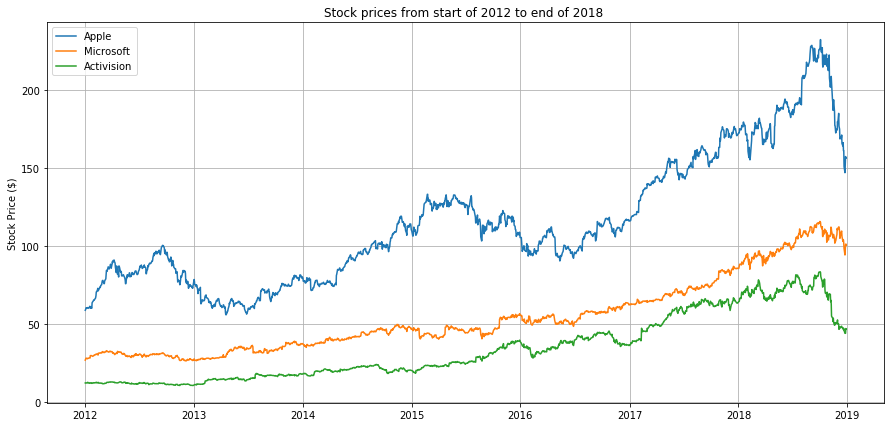

In [99]:
plt.figure(figsize = (15,7))
plt.grid(True)
plt.plot(apple_close["Close"], label='AAPL')
plt.plot(microsoft_close["Close"], label='MSFT')
plt.plot(activision_close["Close"], label='ACTV')
plt.legend(["Apple", "Microsoft", "Activision"]);
plt.title("Stock prices from start of 2012 to end of 2018 ")
plt.ylabel("Stock Price ($)")

Ok so looking at the graph it is clear from stock price fluctuations that although the Apple stock is the most valuable it is actually the most volatile too. I also spot a trend in late 2018. The 3 stocks all dip in value. I did some research and found out it was actually the worst year for stocks since the crash in 2008. "December was a particularly dreadful month: The S&P 500 was down 9% and the Dow was down 8.7% — the worst December since 1931. In one seven-day stretch, the Dow fell by 350 points or more six times. This year's Christmas Eve was the worst ever for the index." source -https://edition.cnn.com/2018/12/31/investing/dow-stock-market-today/index.html . So I'm actually going to look at the volatility of each stock together and find out which was the worst. Upon inspection I would assume it's the Apple stock.

Text(0, 0.5, 'volatility percent (%)')

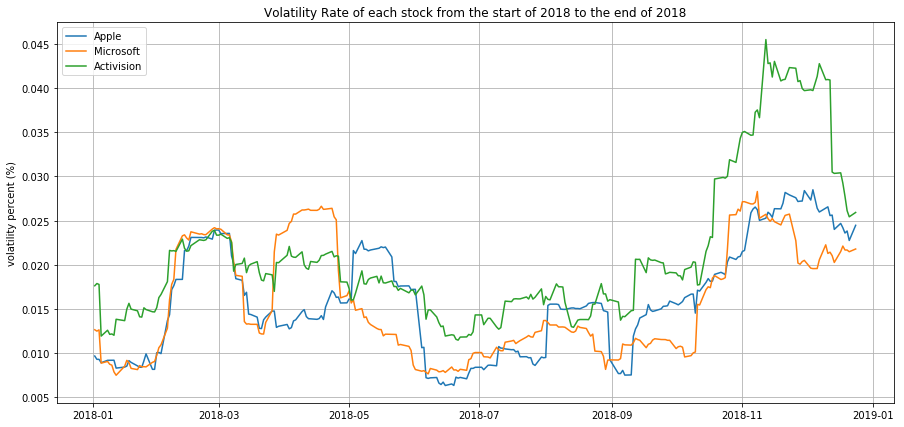

In [98]:
plt.figure(figsize = (15,7))
plt.grid(True)
plt.plot(apple_close["volatility"]["2018-01-01":"2018-12-25"], label='AAPL')
plt.plot(microsoft_close["volatility"]["2018-01-01":"2018-12-25"], label='MSFT')
plt.plot(activision_close["volatility"]["2018-01-01":"2018-12-25"], label='ACTV')
plt.legend(["Apple", "Microsoft", "Activision"]);
plt.title("Volatility Rate of each stock from the start of 2018 to the end of 2018")
plt.ylabel("volatility percent (%)")

So my assumption was in fact wrong and we see that the Activision stock is actually the most volatile, especially in December. The volatility rate is up around 4.5% percent for the stock while the other two are around 2.4%

### Stock price changes
So now I'm going to look at the actual stock price change of 2018 in November and Deceber just to get a sense of the stock value changes.

Text(0, 0.5, 'Stock price change ($)')

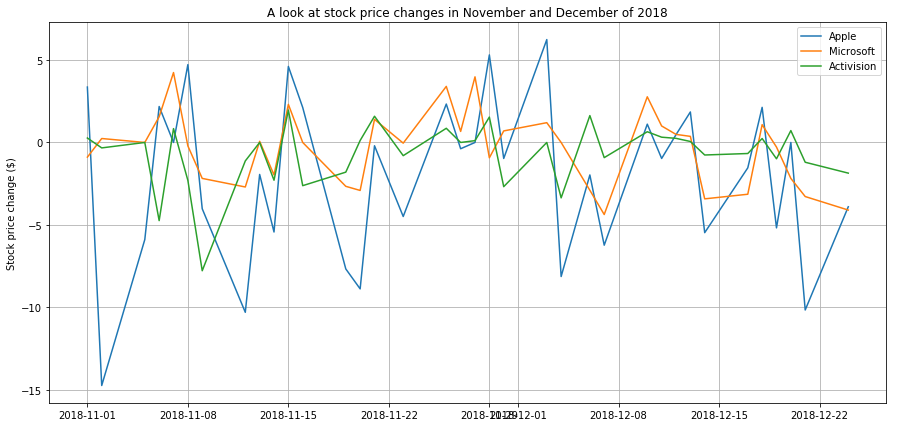

In [104]:
plt.figure(figsize = (15,7))
plt.grid(True)
plt.plot(apple_close["actual_change"]["2018-11-01":"2018-12-25"], label='AAPL')
plt.plot(microsoft_close["actual_change"]["2018-11-01":"2018-12-25"], label='MSFT')
plt.plot(activision_close["actual_change"]["2018-11-01":"2018-12-25"], label='ATVI')
plt.legend(["Apple", "Microsoft", "Activision"]);
plt.title("A look at stock price changes in November and December of 2018")
plt.ylabel("Stock price change ($)")

As we can see the Apple stock is the one that has the most drastic change and has a drop of 15$ at the start of November. The line spends more time in the minuses which correlates with the trend that the stock price is dropping. The same can be said for Microsoft and Activision stocks

### 9 day moving average of each stock
Looking at the graph below we see that throughout 2018, although there were drops in stock price, the graph was growing all the way until around October. The 3 stocks then begin to fall in price consistently. The Microsoft stock seems to have suffered the least while the Apple stock seems to have dropped in value the most

Text(0, 0.5, 'Stock price change ($)')

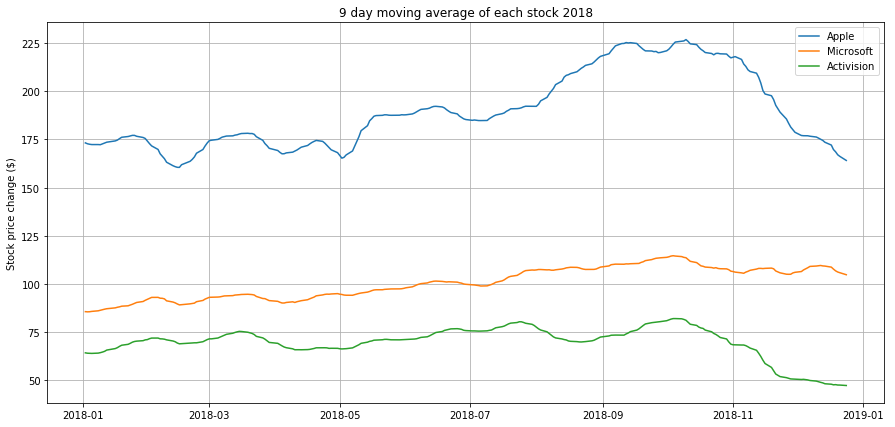

In [100]:
plt.figure(figsize = (15,7))
plt.grid(True)
plt.plot(apple_close["MA_9"]["2018-01-01":"2018-12-25"], label='AAPL')
plt.plot(microsoft_close["MA_9"]["2018-01-01":"2018-12-25"], label='MSFT')
plt.plot(activision_close["MA_9"]["2018-01-01":"2018-12-25"], label='ACTV')
plt.legend(["Apple", "Microsoft", "Activision"]);
plt.title("9 day moving average of each stock 2018")
plt.ylabel("Stock price change ($)")

# What Next?
As my knowledge of stocks and spotting trends is limited I have kept the analysis pretty basic. If I wanted to go more in depth with the analysis I would have to learn some financial topics. I would then try forecast where each stock was going to go and predict what stock was the best to invest in. 